In [1]:
import DataUtils as du
import numpy as np
import tensorflow as tf
import math
import timeit
import matplotlib.pyplot as plt
import pandas as pd

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv(du.images_cooked_train_metadata_filename, sep=',', header=None, names=['label', 'label_name', 'img'])
df['label_name'].value_counts()

dumplings      1091
dal            1031
ramen          1023
icecream       1021
sushi          1020
naan           1020
cordonbleu     1018
pasta          1002
lasagna         971
friedrice       966
roastturkey     930
padthai         919
burger          912
samosa          897
burrito         888
pizza           885
bratwurst       876
biryani         865
sandwich        847
fries           745
Name: label_name, dtype: int64

In [6]:
df.shape

(18927, 3)

In [3]:
import DataUtils as du
X_train, y_train, P_train, X_val, y_val, P_val, X_test, y_test, P_test = du.loadData()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (18927, 32, 32, 3)
Train labels shape:  (18927,)
Validation data shape:  (5375, 32, 32, 3)
Validation labels shape:  (5375,)
Test data shape:  (2682, 32, 32, 3)
Test labels shape:  (2682,)


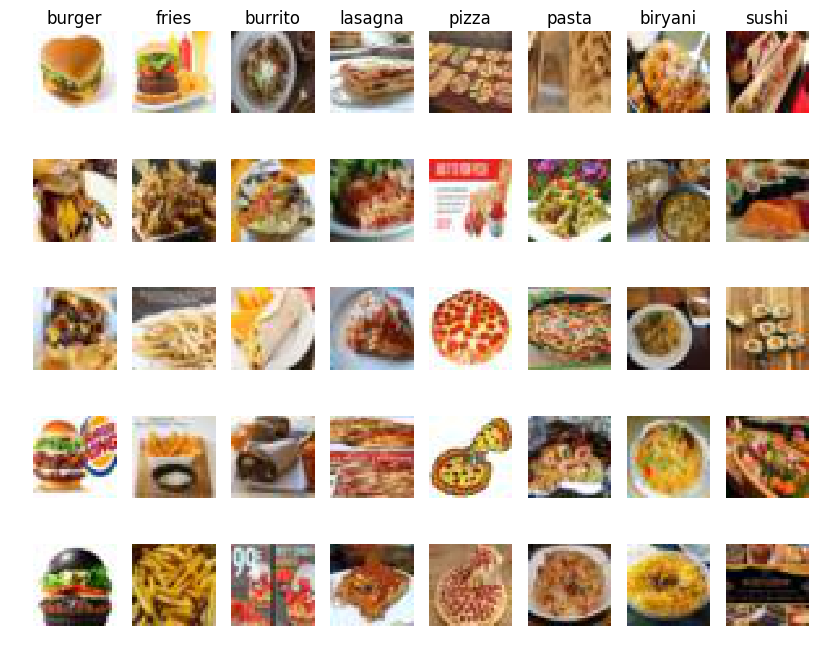

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['burger', 'fries', 'burrito', 'lasagna', 'pizza', 'pasta', 'biryani', 'sushi']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

#plt.savefig('assets/data_vis_2.png')
plt.show()

[[[ 152.49960374  139.56469594  127.47429598]
  [ 153.88349976  140.68299255  128.29439425]
  [ 155.10249908  141.58461457  128.81085222]
  [ 156.33417869  142.48486289  129.21329318]
  [ 157.64146457  143.53051197  129.70623976]
  [ 159.02203202  144.61488878  130.25170392]
  [ 160.35351614  145.67268981  130.7122629 ]
  [ 161.19680879  146.21028161  130.67607122]
  [ 162.36783431  147.08094257  130.91092091]
  [ 163.15063137  147.44143287  130.66645533]
  [ 163.76308977  147.60823163  130.29391874]
  [ 164.38030327  147.83050668  129.95667565]
  [ 165.04364136  148.18867227  129.78496328]
  [ 165.59898558  148.58049347  129.68500026]
  [ 165.7616104   148.63898135  129.45886828]
  [ 165.62704074  148.52787024  129.27690601]
  [ 165.66909706  148.57975379  129.36793998]
  [ 165.87494056  148.71876156  129.638453  ]
  [ 165.85179902  148.80054948  129.92814498]
  [ 165.5093253   148.56564696  130.13446399]
  [ 165.01040841  148.25624769  130.41591377]
  [ 164.60875997  148.22132403  13

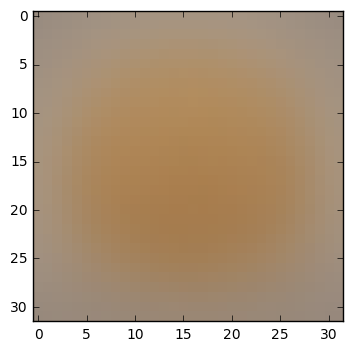

In [5]:
# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()